In [369]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [386]:
df= pd.read_excel('/Users/guillaume/MyProjects/StataProjects/Corporate_finance/project_2/Classeur2.xlsx',Sheet_name='analysis')

df = df.drop(df.index[0])
df.index = df['date']
df = df.drop(df.columns[0], axis=1)

df

,Levered Free Cash Flow,R & D Exp.,Return on Assets %,Total Revenue3,Total Revenue5,Gross Profit,Cost Of Goods Sold,Total Current Taxes,"Other Operating Exp., Total"
date,,,,,,,,,
2011,552.961250,1002.605,0.080648,0.052925,0.054324,0.095993,1941.413,15.518,1408.218
2012,359.288125,1147.282,0.068045,0.087660,0.008743,0.035580,2053.816,25.288,1575.004
2013,492.497000,1336.000,0.045377,0.052399,0.038153,0.140710,1862.000,28.000,1772.000
2014,543.030000,1360.000,0.065648,0.054060,0.070755,0.169428,2083.000,26.000,1840.000
2015,975.375000,1331.000,0.075320,0.053883,0.071731,0.148112,2199.000,-17.000,1933.000
2016,764.375000,1463.000,0.140680,0.187160,0.115651,0.145890,2847.000,42.000,2126.000
2017,1706.125000,1797.000,0.190328,0.275427,0.178115,0.211982,3892.000,508.000,2612.000
2018,1763.250000,2376.000,0.193820,0.327335,0.231873,0.258889,4545.000,70.000,3367.000
2019,3188.250000,2829.000,0.116231,0.164720,0.184520,0.210963,4150.000,156.000,3922.000


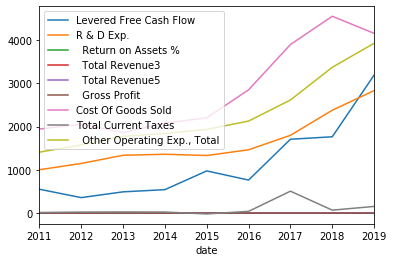

In [387]:
df.plot()

In [381]:

ROA = df['  Return on Assets %']
growthRevenue3 = df['  Total Revenue3']
growthRevenue5 = df['  Total Revenue5']
df.columns
#ROA

Index(['Levered Free Cash Flow', 'R & D Exp.', '  Return on Assets %',
       '  Total Revenue3', '  Total Revenue5', '  Gross Profit',
       'Cost Of Goods Sold', 'Total Current Taxes'],
      dtype='object')

In [275]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [388]:
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Levered Free Cash Flow" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 5.2941
 No. Lags Chosen       = 1
 Critical value 1%     = -4.939
 Critical value 5%     = -3.478
 Critical value 10%    = -2.844
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "R & D Exp." 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.1205
 No. Lags Chosen       = 2
 Critical value 1%     = -5.354
 Critical value 5%     = -3.646
 Critical value 10%    = -2.901
 => P-Value = 0.9954. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "  Return on Assets %" 
    -----------------------------------------------

In [395]:

#df_log_diff = np.log(df[["Levered Free Cash Flow","R & D Exp."]]).diff()
df_log_diff = np.log(df[["Levered Free Cash Flow","  Other Operating Exp., Total"]]).diff()
#df_log_diff['ROA'] = ROA
df_log_diff['growthRevenue3'] = growthRevenue3
df_log_diff = df_log_diff.dropna()
#df_log_diff.drop(df_log_diff.columns[2])
df_log_diff

,Levered Free Cash Flow,"Other Operating Exp., Total",growthRevenue3
date,,,
2012,-0.431163,0.111933,0.087660
2013,0.315364,0.117851,0.052399
2014,0.097676,0.037657,0.054060
2015,0.585657,0.049308,0.053883
2016,-0.243764,0.095169,0.187160
2017,0.802921,0.205874,0.275427
2018,0.032934,0.253906,0.327335
2019,0.592313,0.152580,0.164720


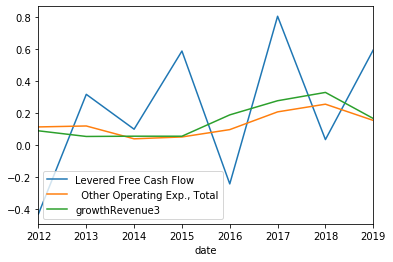

In [396]:
df_log_diff.plot()

In [397]:
for name, column in df_log_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Levered Free Cash Flow" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1161
 No. Lags Chosen       = 0
 Critical value 1%     = -4.939
 Critical value 5%     = -3.478
 Critical value 10%    = -2.844
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "  Other Operating Exp., Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1759
 No. Lags Chosen       = 2
 Critical value 1%     = -6.045
 Critical value 5%     = -3.929
 Critical value 10%    = -2.987
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "growthRevenue3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [406]:
from statsmodels.tsa.api import VAR

model_VAR = VAR(df_log_diff)
results = model_VAR.fit(1)
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Nov, 2020
Time:                     20:51:23
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -14.6810
Nobs:                     7.00000    HQIC:                  -15.7344
Log likelihood:           33.2613    FPE:                7.38223e-07
AIC:                     -14.5883    Det(Omega_mle):     1.90241e-07
--------------------------------------------------------------------
Results for equation Levered Free Cash Flow
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                    0.341714         0.192610            1.774           0.076
L1.Levered Free Cash Flow               -0.615969         0.239849 

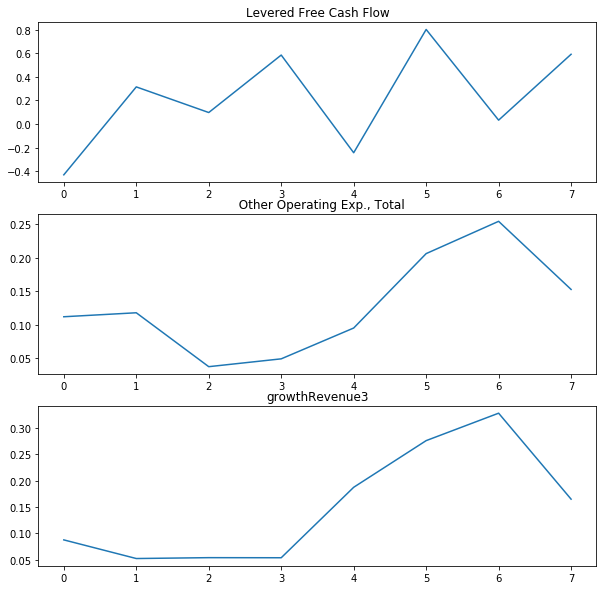

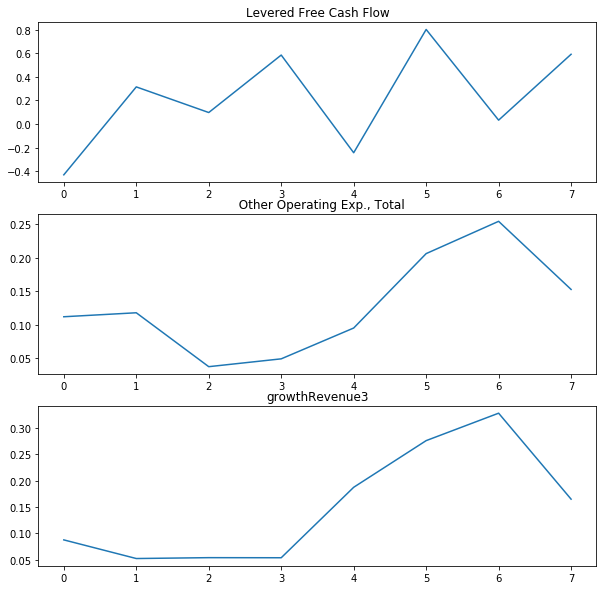

In [403]:
results.plot()

<Figure size 432x288 with 0 Axes>

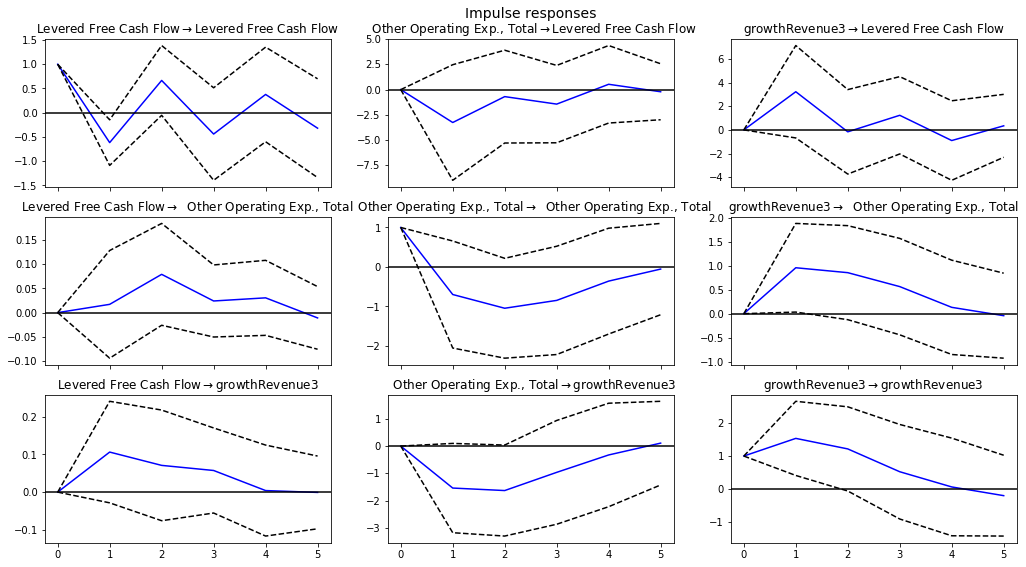

In [407]:
irf = results.irf(5)

fig= plt.figure()
fig=irf.plot()
fig.set_size_inches(15,8)
